# A quick comparison of VGGNet, ResNet, Inception, and Xception with Keras
### by Xige Yang

## Introduction
ImageNet is a large image database organized according to the WordNet hierarchy (Link: http://image-net.org/about-overview), in which each node of the hierarchy is depicted by millions of images. ImageNet organizes _Large Scale Visual Recognition Competition (ILSVRC)_ every year, which had been served as a benchmark testing framework for both computer vision and machine learning communities. In 2012, a convolutional neural network (CNN) called __AlexNet__ (__[Ref.](https://dl.acm.org/citation.cfm?doid=3098997.3065386)__) achieved a top-5 error of 15.3% in the ImageNet 2012 Challenge, more than 10.8 percentage points lower than that of the runner up, significantly outperforming all other classical image classification algorithms in ILSVRC. For this reason, the year 2012 was recognized as "the starting era" of deep learning.
<img src="./Imgs/alexNet.png" width="700">
<center>The architecture of AlexNet, it consists of 2 parallely-trained CNNs, with 5 convolutionary layers and 3 fully-connected layers on each CNN. The authors used _stochastic gradient descent_ method to boost learning efficiency. To avoid the _vanishing gradient problem_, they used a technique called "dropout", to randomly switch some of the neurals. Picture taken from __[this paper](https://dl.acm.org/citation.cfm?doid=3098997.3065386)__</center>

During the past few years, deep learning is growing fast because of 1) _the exponentially growing dimension of data and computational cost for traditional classification algorithms_, and 2) _the high-performance parallel computing behavior of GPU allows efficient implementation of neural networks_. It has seen tremendous successes in many different disciplines beyond image classification, for example, speech recognition, text analysis, DNA sequence etc. I refer the readers to  __[this 2014 paper](https://arxiv.org/abs/1404.7828)__ for an in-depth review on deep learning.

<img src="./Imgs/Why-Deep-Learning.png" width="400">
<center>Why do we need deep learning? Picture taken by the __[slide of Andrew Ng](https://www.slideshare.net/ExtractConf)__.</center>

To visualize the concept of deep learning, in this note, we focus on CNN and image classification. Before we do our experiment, let's give a brief introduction of the most popular deep CNNs in recent years -- VGG, Inception Network, Xception, and ResNet. All these networks cut a striking figure in previous ImageNet contests.

### VGG
VGG refers to __Very Deep CNN__ ( __[Ref.](https://arxiv.org/abs/1409.1556)__). It starts with small (3x3) convolution filters, stride 1 and zero padding 1, and later on switches to max pooling over 2 x 2 pixel window with stride 2. At different depth, number of channels also varies, but it also ends up with 3 fully-connected layers.
<img src="./Imgs/VGG.png" width="400">
<center>The detailed architecture of VGG. Picture taken from __[this paper](https://arxiv.org/abs/1409.1556)__</center>

It is worth noticing that, in this work the authors concluded that, the deeper the CNN is, the better performance we can get. However, while VGG is strong in accuracy, it requires a huge amount of computational resource. For instance, a convolutional layer with 3x3 kernel size which takes 512 channels as input and outputs 512 channels, the order of calculations is 9x512x512. 

### Inception
Inception Network is also called GoogLeNet (__[Ref.](https://www.cs.unc.edu/~wliu/papers/GoogLeNet.pdf)__). It utilized the idea that most of the activations in a deep network are either zero or uncorrelation, providing a sparse struture to the convolution kernel (the weight tensor). For this reason, inception net applied a module called __inception module__ that approximates a sparse CNN with a normal dense construction. The detailed architecture is summaried in the following figure:
<img src="./Imgs/inception.png" width="700">
<center>The detailed architecture of Inception Network. Picture taken from __[this paper](https://www.cs.unc.edu/~wliu/papers/GoogLeNet.pdf)__</center>

Another remarkable change of the inception network is that, unlike AlexNet or VGG, the fully-connected layers at the end was replaced by a simple global average pooling. This significantly reduces the number of unknown parameters, while the prediction accuracy was not affected too much.

### Xception
Xception refers to __extreme inception__, or __Depthwise Separable network__ (__[Ref.](https://arxiv.org/abs/1610.02357)__). Before the broad application of depthwise separable networks, spatial separable convolution has been a popular choice for reducing computational complexity, since it essentially decomposes a large size rank-two tensor (i.e. the kernel) into the multiplication of two vectors. Depthwise Separable network, on the other hand, deals with rank-three tensors (spatial + depth), so the technique part of Xception is how to deal with the __depth__ dimension.

Xception solve this issue by starting with depthwise convolution layers (n×n spatial convolution, used in entry flow) and followed by a pointwise convolution layers (1×1 convolution, used in middle and exit flows). The detailed architecture is summaried in the following figure:
<img src="./Imgs/xception.png" width="700">
<center>The detailed architecture of Xception. Picture taken from __[this paper](https://arxiv.org/abs/1610.02357)__</center>

As one can expect, Xception outperforms Inception V3 (an upgraded version of the original Inception Network), VGG and ResNet-152, but not in a significant sense.

### ResNet
As we had seen before, the more layer we have, the better performance we get. But here comes the problem: if we get too deep into a network, overfitting is inevitable, and the computational cost will be extremely expensive! 
<img src="./Imgs/fast.jpg" width="500">
<center>If you are too strong, you can may not run fast.</center>

ResNet then comes as a popular choice for a light-weight yet accurate network. ResNet refers to Residual Network (__[Ref.](https://arxiv.org/abs/1610.02357)__), it allows nodes to skip over layers, making nonlocal communication between different layers. This mechanism resembles the pyramidal structure of the nerve system.
<img src="./Imgs/residual.png" width="400">
<center>A residual block. A node on layer $i-1$ can communicate with nodes on layer $i+1$ and so on. Picture taken from __[this paper](https://arxiv.org/abs/1610.02357)__</center>

After proposed in 2015, ResNet has been one of the most popular choices of deep neural networks, many new NNs are based on the structure of ResNet. Up to now (03/05/2018), the original ResNet paper has more than 10,000 citations.

## Numerical Experiment
To have a better feeling of CNN and image classification, let's do some experiments. First, let's load the pre-trained models and required packages:

In [1]:
# import the necessary packages
from keras.applications import ResNet50
from keras.applications import InceptionV3
from keras.applications import Xception # TensorFlow ONLY
from keras.applications import VGG16
from keras.applications import VGG19
from keras.applications import imagenet_utils
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
%matplotlib inline
#from PIL import Image
import numpy as np
import argparse
import cv2

Using TensorFlow backend.


Given that we accept the name of our pre-trained network via a command line argument, we need to define a Python dictionary that maps the model names (strings) to their actual Keras classes:

In [2]:
MODELS = {
    "vgg16": VGG16,
    "vgg19": VGG19,
    "inception": InceptionV3,
    "xception": Xception,
    "resnet": ResNet50
}

Next, we initialize the input image shape (224x224 pixels, because CNN models on ImageNet are all trained with data of this size) along with some pre-processing function, which might need to be changed based on which model we use to classify our image. In this case, we initialize our preprocess function to be the standard preprocess_input from Keras (which performs mean subtraction).

In [3]:
inputShape = (224,224)
preprocess = imagenet_utils.preprocess_input

Load the pre-trained network architecture weights from disk and instantiate our model:

In [4]:
Network = MODELS["resnet"]
model_res = Network(weights="imagenet")
#Network = MODELS["vgg16"]
#model_16 = Network(weights="imagenet")
Network = MODELS["vgg19"]
model_19 = Network(weights="imagenet")
Network = MODELS["inception"]
model_v3 = Network(weights="imagenet")
Network = MODELS["xception"]
model_goo = Network(weights="imagenet")

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 0a58e3b7378bc2990ea3b43d5981f1f6 so we will re-download the data.
91889664/91884032 [==============================] - 16s 0us/step

now the CNN is instantiated using the pre-trained ImageNet weights, we just need to load the image for classification. Note that to use CNN, we need to add an extra dimension to the array by "np.expand_dims" command:

In [24]:
img = "./Imgs/workplace.jpg"
#img = "./Imgs/ice_cream.jpg"
#img = "./Imgs/Coffee_Mug.jpg"
#img = "./Imgs/tiny-imagenet-200/test/images/test_0.JPEG"
image = load_img(img, target_size=inputShape)
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = preprocess(image)

We are now ready to pass our image through the network and obtain the output classifications:

In [25]:
import time

print("[INFO] classifying image with '{}'...".format(model_19.name))
start = time.time()
preds = model_19.predict(image)
P_19 = imagenet_utils.decode_predictions(preds)
end = time.time()
print("Prediction finished in {:.3f} secs".format(end-start))
 
# loop over the predictions and display the rank-5 predictions +
# probabilities to our terminal
for (i, (imagenetID, label, prob)) in enumerate(P_19[0]):
    print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))
    
print("\n[INFO] classifying image with '{}'...".format(model_v3.name))
start = time.time()
preds = model_v3.predict(image)
P_v3 = imagenet_utils.decode_predictions(preds)
end = time.time()
print("Prediction finished in {:.3f} secs".format(end-start))
 
# loop over the predictions and display the rank-5 predictions +
# probabilities to our terminal
for (i, (imagenetID, label, prob)) in enumerate(P_v3[0]):
    print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))

print("\n[INFO] classifying image with '{}'...".format(model_goo.name))
start = time.time()
preds = model_goo.predict(image)
P_goo = imagenet_utils.decode_predictions(preds)
end = time.time()
print("Prediction finished in {:.3f} secs".format(end-start))
 
# loop over the predictions and display the rank-5 predictions +
# probabilities to our terminal
for (i, (imagenetID, label, prob)) in enumerate(P_goo[0]):
    print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))
    
print("\n[INFO] classifying image with '{}'...".format(model_res.name))
start = time.time()
preds = model_res.predict(image)
P_res = imagenet_utils.decode_predictions(preds)
end = time.time()
print("Prediction finished in {:.3f} secs".format(end-start))
 
# loop over the predictions and display the rank-5 predictions +
# probabilities to our terminal
for (i, (imagenetID, label, prob)) in enumerate(P_res[0]):
    print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))

[INFO] classifying image with 'vgg19'...
Prediction finished in 23.569 secs
1. notebook: 50.83%
2. laptop: 38.69%
3. mouse: 1.36%
4. modem: 0.97%
5. printer: 0.97%

[INFO] classifying image with 'inception_v3'...
Prediction finished in 1.594 secs
1. web_site: 100.00%
2. stopwatch: 0.00%
3. pencil_sharpener: 0.00%
4. toilet_tissue: 0.00%
5. starfish: 0.00%

[INFO] classifying image with 'xception'...
Prediction finished in 1.909 secs
1. ping-pong_ball: 99.58%
2. lens_cap: 0.22%
3. nipple: 0.18%
4. military_uniform: 0.02%
5. lipstick: 0.00%

[INFO] classifying image with 'resnet50'...
Prediction finished in 3.854 secs
1. notebook: 63.71%
2. laptop: 12.52%
3. iPod: 7.20%
4. mouse: 2.86%
5. desk: 2.73%


As we may expect, VGG takes longer time than other CNNs because of its number of parameters. ResNet outperforms other CNNs (you can try with your own image and the result is the same).

Finally, we load the input image from our local path, draw the #1 prediction on the image, and finally display the image to our screen:

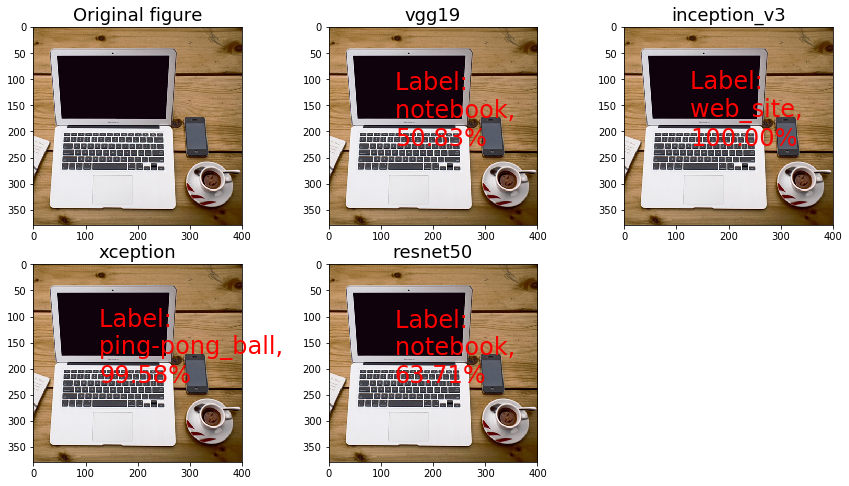

In [26]:
fig1 = plt.figure(figsize=(15,8))
orig = load_img(img)

plt.subplot(231)
plt.title('Original figure', fontsize=18)
plt.imshow(orig)

ax = plt.subplot(232)
(imagenetID, label, prob) = P_19[0][0]
ax.set_title('{}'.format(model_19.name), fontsize=18)
ax.text(orig.size[1]/3, 3*orig.size[1]/5, "Label: \n{}, \n{:.2f}%".format(label, prob * 100),\
        color='red',fontsize = 24)
plt.imshow(orig)

ax = plt.subplot(233)
(imagenetID, label, prob) = P_v3[0][0]
ax.set_title('{}'.format(model_v3.name), fontsize=18)
ax.text(orig.size[1]/3, 3*orig.size[1]/5, "Label: \n{}, \n{:.2f}%".format(label, prob * 100),\
        color='red',fontsize = 24)
plt.imshow(orig)

ax = plt.subplot(234)
(imagenetID, label, prob) = P_goo[0][0]
ax.set_title('{}'.format(model_goo.name), fontsize=18)
ax.text(orig.size[1]/3, 3*orig.size[1]/5, "Label: \n{}, \n{:.2f}%".format(label, prob * 100),\
        color='red',fontsize = 24)
plt.imshow(orig)

ax = plt.subplot(235)
(imagenetID, label, prob) = P_res[0][0]
ax.set_title('{}'.format(model_res.name), fontsize=18)
ax.text(orig.size[1]/3, 3*orig.size[1]/5, "Label: \n{}, \n{:.2f}%".format(label, prob * 100),\
        color='red',fontsize = 24)
plt.imshow(orig)

<b>Quick Remarks:</b>
1. Seems that the pre-trained Inception and Xception still needs training...;
2. ResNet50 is the most efficient and accurate model amoung the four.